# Naive Implementation of 1D Watershed Transform

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

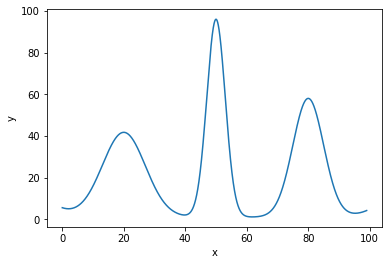

In [2]:
# create artificial 1D signal from mixture of Gaussians

x = np.linspace(0, 99, 10000)
n0 = norm(-20, 10).pdf(x)
n1 = norm(20, 7).pdf(x)
n2 = norm(50, 3).pdf(x)
n3 = norm(80, 5).pdf(x)
n4 = norm(120, 10).pdf(x)
y = n0 + n1 + n2 + n3 + n4
y = 95*y/np.max(y) + 1

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
# step 1: find local minima to start with

from scipy.signal import argrelmin

minima = argrelmin(y)[0]
print(minima)

[ 205 4013 6241 9621]


In [4]:
# step 2: discretize
img = np.zeros((100, 100))

for i in range(len(x)):
    col = int(np.round(x[i]))
    row = int(np.round(y[i]))
    img[row, col] = 5

In [5]:
# in images, the origin is in the top-left
# let's write a function that plots the images 'as is' (i.e. upside-down)

def imshow_upsidedown(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_ylim([0, 100])  # flip y axis
    return fig, ax

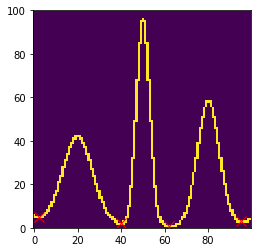

In [6]:
# Let's mark the starting points of the flooding

markers = np.array([np.round(y[minima]).astype('int'),
                    np.round(x[minima]).astype('int')])

fig, ax = imshow_upsidedown(img)
ax.plot(markers[1], markers[0], 'rx', markersize=10)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a244cad10>)

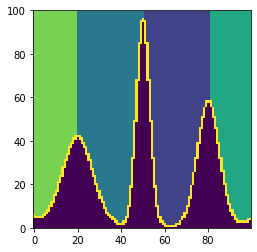

In [7]:
# step 3: start rising the water! (very slow)

start_markers = markers.T.tolist()
todo = []
marker_counter = 1

for level in range(100):  # rise the water level
    
    # set marker active when water reaches marker
    active_markers = []
    for i, m in enumerate(start_markers):
        if level == m[0]+1:
            active_markers.append([m[0], m[1]])

    for m in active_markers:
        todo.append([m[0]+1, m[1]])
        img[todo[-1][0], todo[-1][1]] = marker_counter
        marker_counter = marker_counter + 1
        start_markers.remove(m)

    # create active set by using current level
    active_todo = list(filter(lambda x: x[0] <= level, todo))
    active_done = []
    
    # go through active set
    while len(active_todo) > 0:
        elem = active_todo.pop()

        # go up
        ...

        # go left
        ...

        # go right
        ...

        active_done.append(elem)
    
    # remove active_done from todo list
    todo = [x for x in todo if x not in active_done]

imshow_upsidedown(img)

In [8]:
plt.close('all')

## Let's try watershed from `skimage`

In [9]:
from skimage.data import coins
from skimage.io import imshow
from skimage.segmentation import watershed
from skimage.filters import sobel

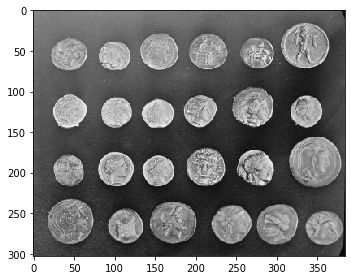

In [10]:
image = coins()
imshow(image)

/Users/max-heinrichlaves/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


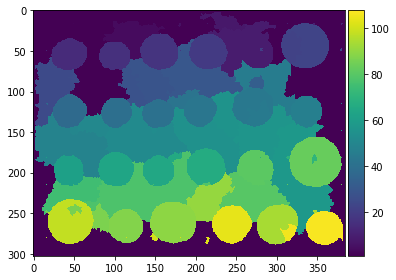

In [11]:
edges = sobel(image)  # perform watershed on edge image
seg = watershed(edges, markers=105)
imshow(seg)